In [1]:
import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
#nltk.download('stopwords')
%matplotlib inline

In [2]:
dataset = pd.read_csv('drugsComAll_final.csv')
dataset.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_label,plain_text,text
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4,-1,"""Been on the depo injection since January 2015...","Been on the depo injection since January 2015,..."
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11,1,"""I'm 21 years old and recently found out I mig...",I'm 21 years old and recently found out I migh...
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7,1,"""I have been on the shot 11 years and until a ...",I have been on the shot 11 years and until a m...
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12,1,"""Ive had four shots at this point. I was on bi...",Ive had four shots at this point. I was on bir...
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4,-1,"""I had a total of 3 shots. I got my first one ...",I had a total of 3 shots. I got my first one b...


In [3]:
dataset = dataset[["text","rating_label"]]

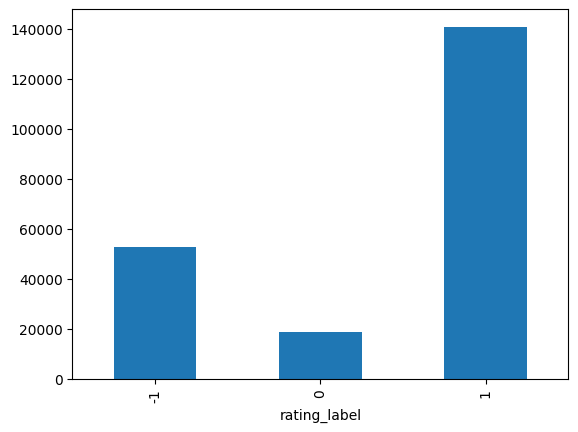

In [7]:
dataset.groupby('rating_label').text.count().plot.bar(ylim=0)
plt.show()

In [4]:
#nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [5]:
dataset.head(10)

,text,rating_label,cleaned
0,"Been on the depo injection since January 2015,...",-1,been depo inject sinc januari bleed stop when ...
1,I'm 21 years old and recently found out I migh...,1,i year old recent found i might pco i gotten p...
2,I have been on the shot 11 years and until a m...,1,i shot year month ago never period even spot a...
3,Ive had four shots at this point. I was on bir...,1,ive four shot point i birth control pill year ...
4,I had a total of 3 shots. I got my first one b...,-1,i total shot i got first one leav hospit give ...
5,This is a horrible shot!! I got my first shot ...,-1,thi horribl shot i got first shot august ever ...
6,I'm 18 and got this for heavy bleeding. I've a...,0,i got heavi bleed i alway heard bc make gain w...
7,Im 19 and have been having heavy and painful p...,0,im heavi pain period sinc forev i got depo sho...
8,I'm a 30 year old woman. I got the shot on Aug...,-1,i year old woman i got shot august th i bleed ...
9,I'm 17 years old and I got shot in August 2015...,1,i year old i got shot august person i mind i m...


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape
print("Features are done")
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))